5. Heart Disease Prediction
   - Goal: Identify individuals likely to have heart disease.
   - Dataset: UCI Heart Disease Dataset.
   - Tools: Logistic Regression, Decision Tree, Seaborn.
   - Skills: Feature importance, classification.

In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("heart.csv")

# Displaying the first 5 rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Data types and non-null counts
df.info()

Shape of dataset: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Count of missing values in each column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Value counts of target variable
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

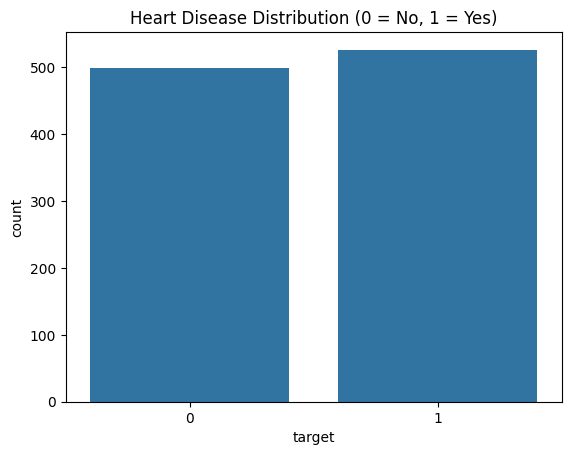

In [8]:
# Visualizing class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()


Visualizing Using Seaborn and Matplotlib

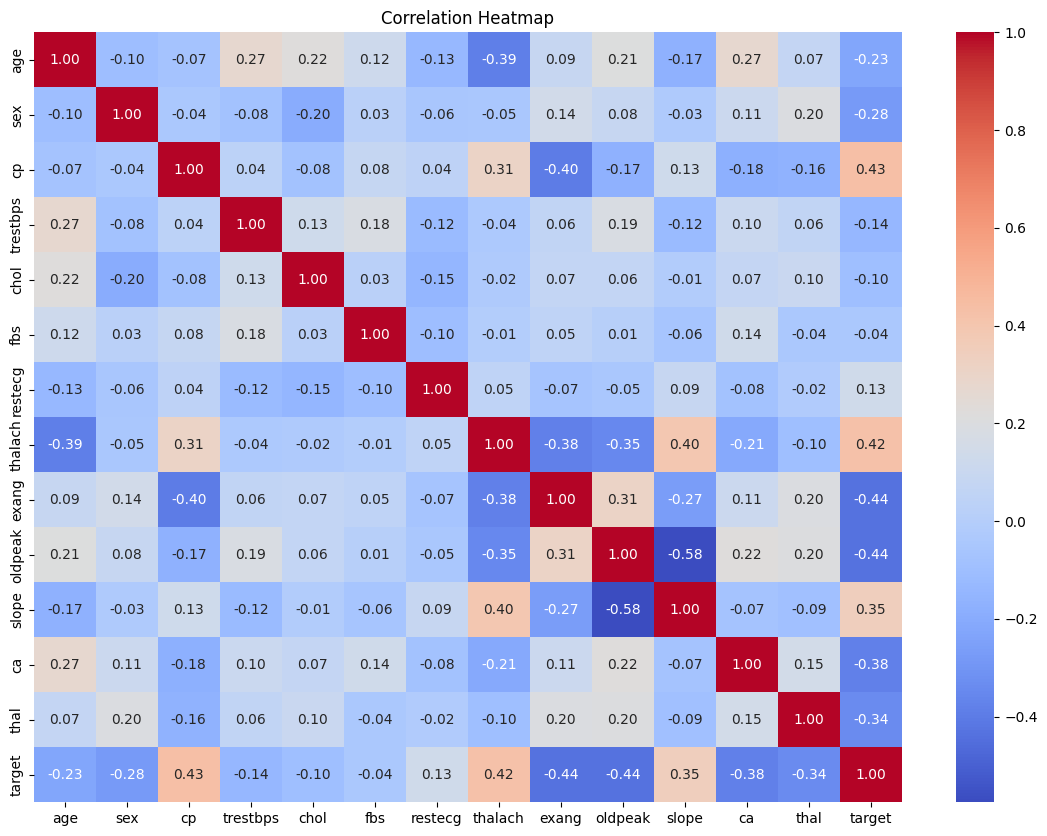

In [ ]:
# corelation heatmap
# Showing how features relate to each other (especially with the target)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


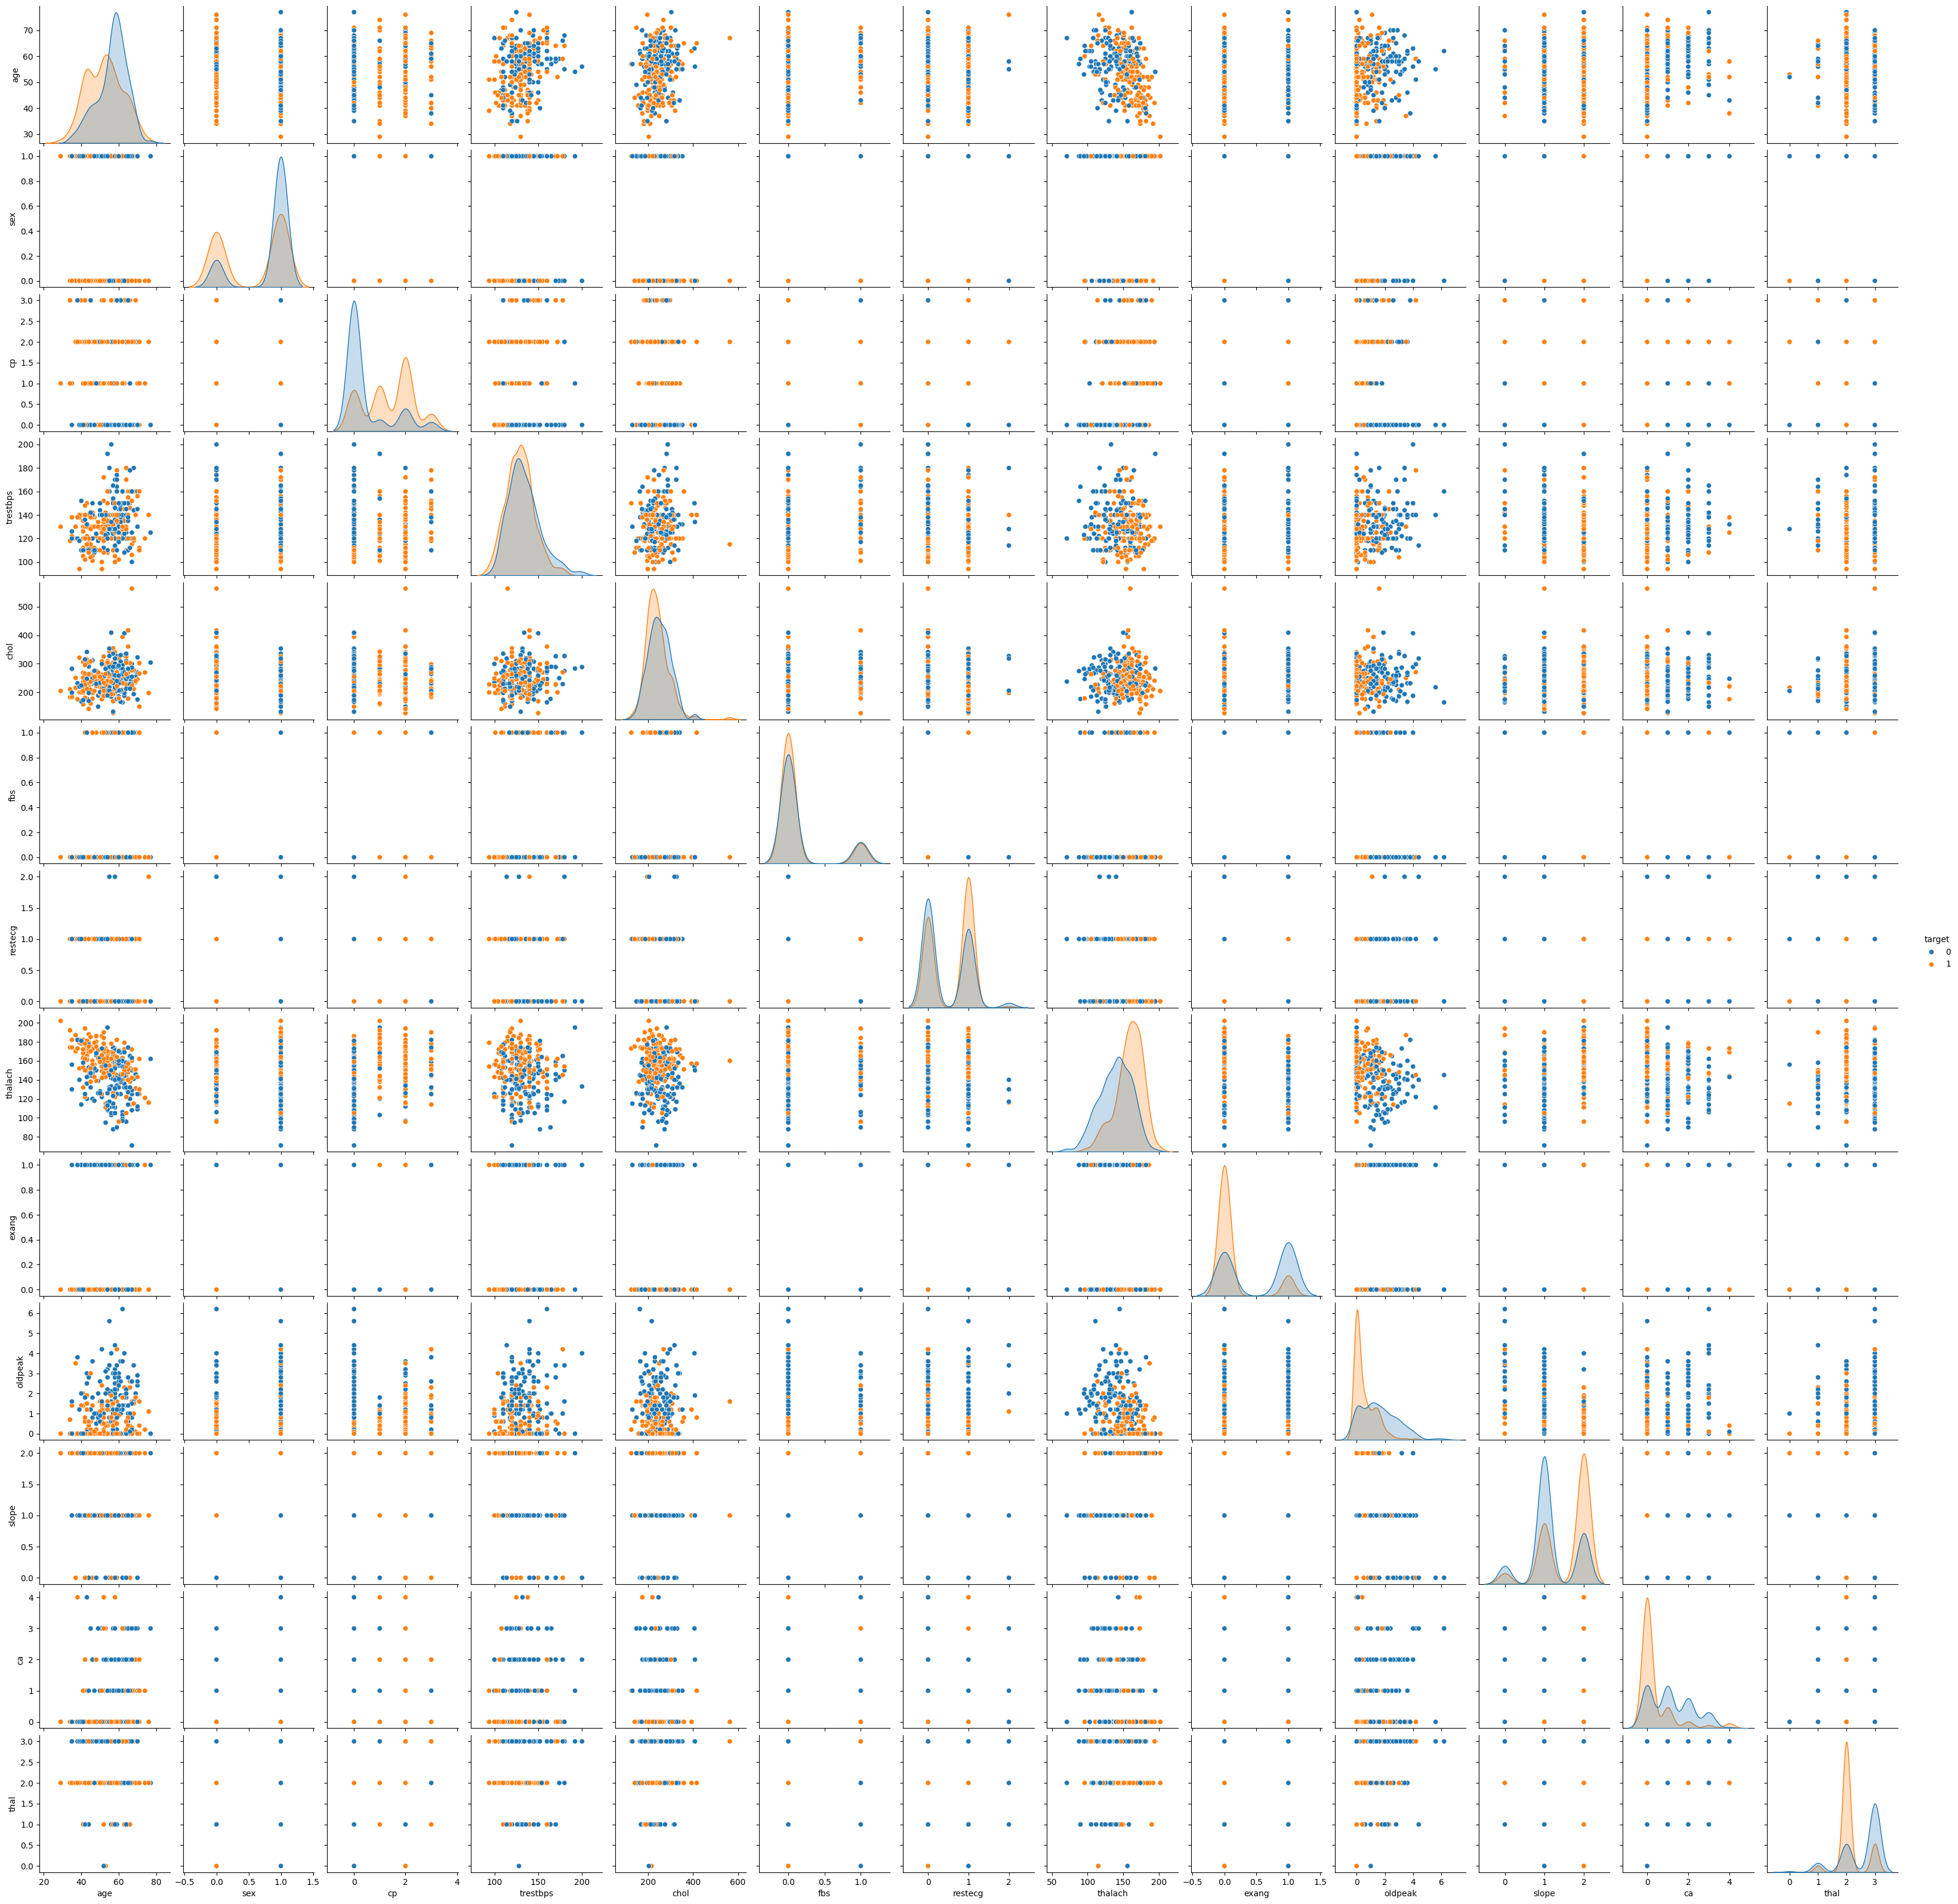

In [10]:
# Pairplot
# showing pairwise relationships
sns.pairplot(df, hue="target")
plt.show()


Visualize Features Against Target

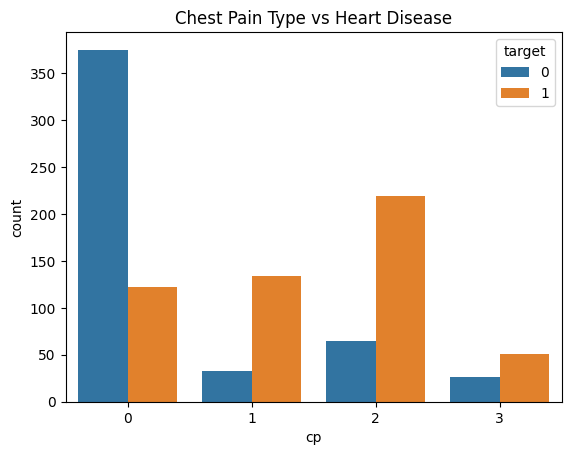

In [11]:
# Chest Pain Type vs Target
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

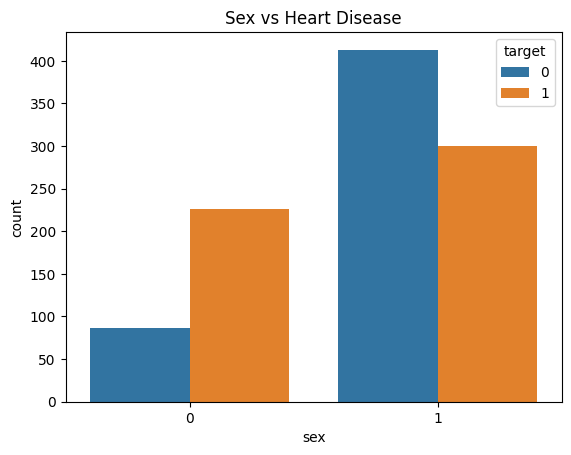

In [12]:
# Sex vs Target
sns.countplot(x='sex', hue='target', data=df)
plt.title("Sex vs Heart Disease")
plt.show()

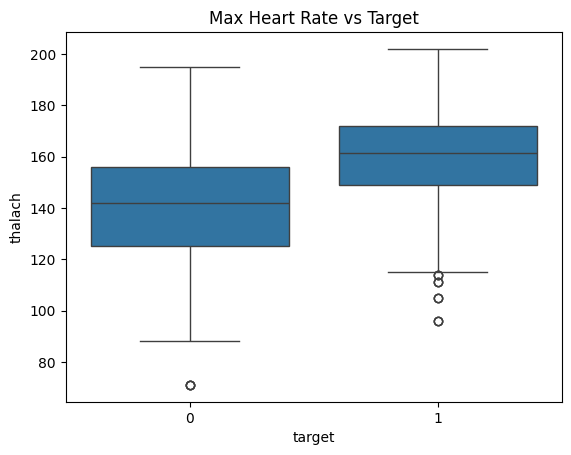

In [13]:
# Max Heart Rate (thalach) Distribution
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Max Heart Rate vs Target")
plt.show()

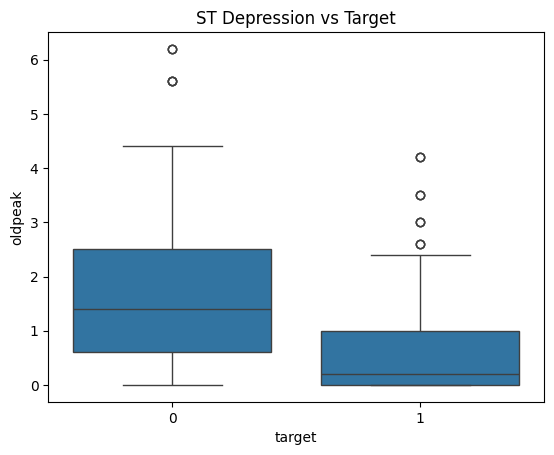

In [14]:
# ST Depression (oldpeak) vs Target
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title("ST Depression vs Target")
plt.show()

Preprocessing Data

In [ ]:
# checking datatype
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [17]:
# Feature Scaling (important for Logistic Regression)

from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Initialize scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train - Test splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



 Building Logistic Regression Model

In [18]:
# Import and Train the Model
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

# Train the model
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
# Predict the labels for test data
y_pred_lr = lr.predict(X_test)

In [20]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.7951219512195122

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Confusion Matrix:
 [[73 29]
 [13 90]]


Building Decision Tree Model

In [21]:
# Import and Train the Model
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
# Predict the labels for test data
y_pred_dt = dt.predict(X_test)


In [23]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[102   0]
 [  3 100]]


Feature Importance

In [24]:
# Get feature importances from the trained Decision Tree
importances = dt.feature_importances_

# Match them with feature names
feature_names = df.drop('target', axis=1).columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
2,cp,0.274524
12,thal,0.147141
11,ca,0.118901
4,chol,0.096328
9,oldpeak,0.094503
0,age,0.055125
7,thalach,0.053874
3,trestbps,0.047069
10,slope,0.043984
1,sex,0.026434


C:\Users\pushk\AppData\Local\Temp\ipykernel_6832\488697257.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


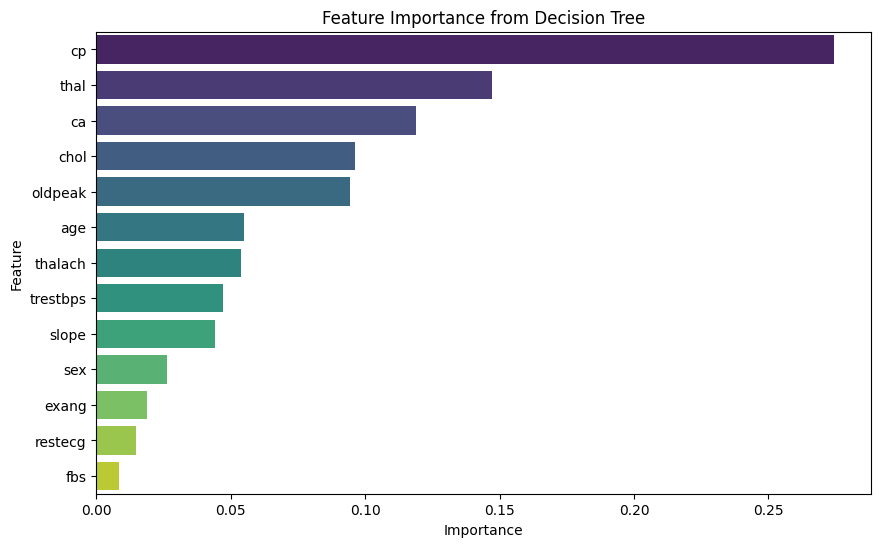

In [25]:
# Visualize Feature Importance

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from Decision Tree")
plt.show()


Final Evaluation and Insights

    Logistic Regression:

        Accuracy = 79%  (Simple, interpretable, may underfit)


    Decision Tree:

        Accuracy = 98%  (Powerful, may overfit, gives feature importance)

What I Learned

    Classification using Logistic Regression and Decision Trees
    Feature importance analysis
    Model evaluation with metrics and confusion matrix
    Use of Seaborn and Matplotlib for data visualization
    How to prepare real-world medical data for ML